# Q3

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
#os.getcwd()

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()

In [6]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

In [8]:
file = "\HW2 data\Dbig.txt"
path = os.getcwd()+file
Dbig = np.loadtxt(path)

# permutation
random.seed(531)
permu = random.sample(range(10000), 10000)

# test set
#print(len(permu[8192:]))
Y_test=Dbig[permu[8192:],2]
X_test=Dbig[permu[8192:],0:2]

# training set
set_size = [32, 128, 512, 2048, 8192]

# Initialize lists to store results
nodes_n = []
err_n = []
clf = DecisionTreeClassifier()

for size in set_size:
    Y = Dbig[permu[:size],2]
    X = Dbig[permu[:size],0:2]
    
    clf.fit(X, Y)
    #clf.plot_decision_boundary(X,Y)
    Y_pred = clf.predict(X_test)
    err = 1-accuracy(Y_test, Y_pred)
    n_nodes = clf.tree_.node_count
    
    err_n.append(err)
    nodes_n.append(n_nodes)

In [9]:
nodes_vs_err = pd.DataFrame({ 'n_nodes':nodes_n, 'err_n':err_n},index=set_size)
print(nodes_vs_err)

      n_nodes     err_n
32          7  0.163717
128        23  0.089602
512        55  0.038717
2048      103  0.029314
8192      237  0.009403


Text(0.5, 1.0, 'Learning Curve')

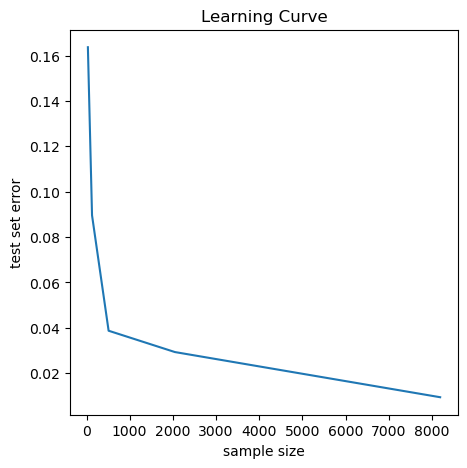

In [10]:
plt.figure(figsize = (5, 5))
plt.plot(set_size, err_n)
# ax.axhline(0, color = 'black')
# ax.axvline(0, color = 'black')
plt.xlabel("sample size")
plt.ylabel('test set error')
plt.title("Learning Curve")
